In [2]:
import pandas as pd
import pip
pip.main(["install", "openpyxl"])
pip.main(["install", "xlrd"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: openpyxl in /opt/homebrew/lib/python3.11/site-packages (3.1.2)

Requirement already satisfied: et-xmlfile in /opt/homebrew/lib/python3.11/site-packages (from openpyxl) (1.1.0)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: xlrd in /opt/homebrew/lib/python3.11/site-packages (2.0.1)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip

0

In [3]:
global_dir = '/Users/bram/Desktop/Honors Draft for Reviewers'

In [4]:
# Get private non financial firm debt 
def read_pfd_data():
    url = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_TC/2.0/Q.AR+AT+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FI+FR+GB+GR+HK+HU+ID+IE+IL+IN+IT+JP+KR+LU+MX+MY+NL+NO+NZ+PL+PT+RU+SA+SE+SG+TH+TR+US+XM+ZA.N.A.M.770.A?startPeriod=1947-01-01&endPeriod=2025-01-01&format=csv"
    df = pd.read_csv(url)
    df = df[df['TC_LENDERS'] != 'B']  # TC_Lenders the B means bank only and A means all so keep all
    df = df[['BORROWERS_CTY', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'BORROWERS_CTY': 'Code', 'OBS_VALUE': 'private_debt'})
    df['TIME_PERIOD'] = (pd.to_datetime(df['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))
    privatedebt = df.set_index(['Code', 'TIME_PERIOD'])
    return privatedebt
private_firm_debt = read_pfd_data()
private_firm_debt

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_31129/621672162.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = (pd.to_datetime(df['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))


private_debt
Code TIME_PERIOD              
SA   1998-03-31         17.200
     1998-06-30         19.000
     1998-09-30         22.400
     1998-12-31         24.000
     1999-03-31         19.800
...                        ...
CO   2023-06-30         31.338
     2023-09-30         31.222
     2023-12-31         30.827
     2024-03-31         30.594
     2024-06-30         30.324

[6443 rows x 1 columns]

In [4]:
### Get hhd data
def read_hhd():
    hhd_url = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_TC/2.0/Q.AR+AT+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FI+FR+GB+GR+HK+HU+ID+IE+IL+IN+IT+JP+KR+LU+MX+MY+NL+NO+NZ+PL+PT+RU+SA+SE+SG+TH+TR+US+XM+ZA.H.A.M.770.A?startPeriod=1947-01-01&endPeriod=2025-01-01&format=csv"
    hhd_df = pd.read_csv(hhd_url)
    hhd_df = hhd_df[['BORROWERS_CTY', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'BORROWERS_CTY': 'Code', 'OBS_VALUE': 'household_debt'})
    hhd_df['TIME_PERIOD'] = (pd.to_datetime(hhd_df['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))
    hhd_df = hhd_df.set_index(['Code', 'TIME_PERIOD'])
    return hhd_df
hhd_df = read_hhd()

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_13877/3605699895.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hhd_df['TIME_PERIOD'] = (pd.to_datetime(hhd_df['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))


In [5]:
hhd_df[hhd_df.index.get_level_values("Code") == "ZA"]

household_debt
Code TIME_PERIOD                
ZA   2008-03-31             44.4
     2008-06-30             43.4
     2008-09-30             42.6
     2008-12-31             41.8
     2009-03-31             41.5
...                          ...
     2023-06-30             34.4
     2023-09-30             34.4
     2023-12-31             34.4
     2024-03-31             34.4
     2024-06-30             34.3

[66 rows x 1 columns]

In [6]:
# def read_policy_rate():
#     policy_rate_url = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBPOL/1.0/M.AR+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FR+GB+HK+HR+HU+ID+IL+IN+IS+IT+JP+KR+MA+MK+MX+MY+NL+NO+NZ+PE+PH+PL+PT+RO+RS+RU+SA+SE+TH+TR+US+XM+ZA?startPeriod=1944-01-01&endPeriod=2025-01-01&format=csv"
#     policy_rate = (pd.read_csv(policy_rate_url)
#                    .rename(columns={'OBS_VALUE': 'policy_rate', 'REF_AREA': 'Code'})
#                    .loc[:, ['policy_rate', 'Code', 'TIME_PERIOD']]
#                    .dropna())
#     # Convert TIME_PERIOD to datetime and set as index
#     policy_rate['TIME_PERIOD'] = pd.to_datetime(policy_rate['TIME_PERIOD'], format='%Y-%m')
#     policy_rate = policy_rate.set_index('TIME_PERIOD').groupby('Code').resample('QE').mean()
#     return policy_rate
# policyrate = read_policy_rate()

policy_rate_url = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBPOL/1.0/M.AR+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FR+GB+HK+HR+HU+ID+IL+IN+IS+IT+JP+KR+MA+MK+MX+MY+NL+NO+NZ+PE+PH+PL+PT+RO+RS+RU+SA+SE+TH+TR+US+XM+ZA?startPeriod=1944-01-01&endPeriod=2025-01-01&format=csv"
policy_rate = (pd.read_csv(policy_rate_url)
               .rename(columns={'OBS_VALUE': 'policy_rate', 'REF_AREA': 'Code'})
               .loc[:, ['policy_rate', 'Code', 'TIME_PERIOD']]
               .dropna())
# Convert TIME_PERIOD to datetime and set as index
policy_rate['TIME_PERIOD'] = pd.to_datetime(policy_rate['TIME_PERIOD'], format='%Y-%m')
policy_rate = policy_rate.set_index('TIME_PERIOD').groupby('Code').resample('Q').mean()

policy_rate

policy_rate
Code TIME_PERIOD             
AR   1993-06-30      0.423333
     1993-09-30      0.400000
     1993-12-31      0.533333
     1994-03-31      0.343333
     1994-06-30      0.660000
...                       ...
ZA   2024-03-31      8.250000
     2024-06-30      8.250000
     2024-09-30      8.166667
     2024-12-31      7.833333
     2025-03-31      7.500000

[7702 rows x 1 columns]

In [7]:
# policy_rate[policy_rate.index.get_level_values("Code") == "ES"]
policy_rate.index.get_level_values("Code").unique()

Index(['AR', 'AU', 'BE', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'CZ', 'DE', 'DK',
       'ES', 'FR', 'GB', 'HK', 'HR', 'HU', 'ID', 'IL', 'IN', 'IS', 'IT', 'JP',
       'KR', 'MA', 'MK', 'MX', 'MY', 'NL', 'NO', 'NZ', 'PE', 'PH', 'PL', 'PT',
       'RO', 'RS', 'RU', 'SA', 'SE', 'TH', 'TR', 'US', 'XM', 'ZA'],
      dtype='object', name='Code')

In [180]:
def read_gdp():
    gdp = pd.read_excel('/Users/bram/Desktop/Honors Draft for Reviewers/Honors-DeepVAR-Household-Debt-Analysis/CleanData/RealGDP.xlsx')  
    gdpdf = pd.DataFrame(
        gdp
            .set_index(['Country', 'Scale'])
            .stack()
    ).reset_index().rename(
        columns={'level_2': 'TIME_PERIOD', 0: 'GDP'}
    )
    gdpdf['TIME_PERIOD'] = (pd.to_datetime(gdpdf['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))
    return gdpdf
gdp_df = read_gdp()
gdp_df 

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_13877/855636149.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdpdf['TIME_PERIOD'] = (pd.to_datetime(gdpdf['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))


,Country,Scale,TIME_PERIOD,GDP
0,Argentina,Millions,1950-03-31,...
1,Argentina,Millions,1950-06-30,...
2,Argentina,Millions,1950-09-30,...
3,Argentina,Millions,1950-12-31,...
4,Argentina,Millions,1951-03-31,...
...,...,...,...,...
19365,United States,Millions,2023-06-30,5556337.5
19366,United States,Millions,2023-09-30,5622673
19367,United States,Millions,2023-12-31,5669814
19368,United States,Millions,2024-03-31,5689688


In [6]:
urls = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_SPP/1.0/Q..N.628?format=csv"]

housing_prices = pd.concat([pd.read_csv(url) for url in urls])
housing_prices = housing_prices.rename(columns={'OBS_VALUE': 'housing_price', 'REF_AREA': 'Code'})
housing_prices = housing_prices.loc[:, ['housing_price', 'Code', 'TIME_PERIOD']]
housing_prices['TIME_PERIOD'] = (pd.to_datetime(housing_prices['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))
housing_prices


/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_31129/1273519729.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  housing_prices['TIME_PERIOD'] = (pd.to_datetime(housing_prices['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))


,housing_price,Code,TIME_PERIOD
0,110.3066,5R,2007-12-31
1,108.8253,5R,2008-03-31
2,107.0285,5R,2008-06-30
3,104.6137,5R,2008-09-30
4,101.1258,5R,2008-12-31
...,...,...,...
8833,253.7933,CO,2023-09-30
8834,244.7049,CO,2023-12-31
8835,267.4832,CO,2024-03-31
8836,265.0267,CO,2024-06-30


In [9]:
hai = pd.read_excel("/Users/bram/Desktop/Honors Draft for Reviewers/Honors-DeepVAR-Household-Debt-Analysis/CleanData/HAI.xls")
hai['TIME_PERIOD'] = pd.to_datetime(hai['Year_Quarter']) + pd.offsets.QuarterEnd()
hai = hai.drop(columns = {'Year_Quarter'})
df_long = hai.melt(id_vars=['TIME_PERIOD'], var_name='Country', value_name='Housing_Affordability')
df_long = df_long.dropna()
df_long

,TIME_PERIOD,Country,Housing_Affordability
0,1970-03-31,Australia,57.165684
1,1970-06-30,Australia,49.039551
2,1970-09-30,Australia,48.977459
3,1970-12-31,Australia,48.734589
4,1971-03-31,Australia,48.593975
...,...,...,...
8595,2022-09-30,United_States,101.056068
8596,2022-12-31,United_States,90.785767
8597,2023-03-31,United_States,93.849350
8598,2023-06-30,United_States,92.270676


In [10]:
def read_exchange_rate():
    urls = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_EER/1.0/M.R?format=csv"]
    df = pd.concat([pd.read_csv(url) for url in urls])
    df = df[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']]
    df = df.rename(columns = {"REF_AREA": "Code", "OBS_VALUE": "exchange_rate"})
    df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], format='%Y-%m')
    df['Code'] = df['Code'].astype(str)
    df = df.set_index('TIME_PERIOD')
    df = df.groupby('Code').resample('Q').mean()
    return df
exchange_rate_df = read_exchange_rate()

In [11]:
unique_codes = [
    'NZ', 'DE', 'GR', 'BR', 'TH', 'BE', 'TR', '5A', 'PL', 'NO', 'CZ', 'IT', 'KR', 
    'SG', 'HU', '5R', 'PT', 'IN', 'US', 'NL', 'LU', 'GB', 'ID', 'FI', 'SE', 'CL', 
    'IE', 'ZA', 'SA', 'MX', 'MY', 'FR', 'AR', 'AT', 'IL', 'CH', 'CN', 'ES', '4T', 
    'CO', 'CA', 'AU', 'G2', 'RU', 'DK', 'XM', 'HK', 'JP'
]
code_map = {
    'AL': 'Albania',
    'DZ': 'Algeria',
    'AR': 'Argentina',
    'AM': 'Armenia, Rep. of',
    'AU': 'Australia',
    'AT': 'Austria',
    'AZ': 'Azerbaijan, Rep. of',
    'BS': 'Bahamas, The',
    'BY': 'Belarus, Rep. of',
    'BE': 'Belgium',
    'BO': 'Bolivia',
    'BA': 'Bosnia and Herzegovina',
    'BW': 'Botswana',
    'BR': 'Brazil',
    'BN': 'Brunei Darussalam',
    'BG': 'Bulgaria',
    'CV': 'Cabo Verde',
    'CM': 'Cameroon',
    'CA': 'Canada',
    'CL': 'Chile',
    'HK': 'China, P.R.: Hong Kong',
    'MO': 'China, P.R.: Macao',
    'CN': 'China, P.R.: Mainland',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'HR': 'Croatia, Rep. of',
    'CY': 'Cyprus',
    'CZ': 'Czech Rep.',
    'DK': 'Denmark',
    'DO': 'Dominican Rep.',
    'EC': 'Ecuador',
    'EG': 'Egypt, Arab Rep. of',
    'SV': 'El Salvador',
    'EE': 'Estonia, Rep. of',
    'EA': 'Euro Area',
    'FI': 'Finland',
    'FR': 'France',
    'GE': 'Georgia',
    'DE': 'Germany',
    'GH': 'Ghana',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IN': 'India',
    'ID': 'Indonesia',
    'IR': 'Iran, Islamic Rep. of',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'JP': 'Japan',
    'JO': 'Jordan',
    'KZ': 'Kazakhstan, Rep. of',
    'KE': 'Kenya',
    'KR': 'Korea, Rep. of',
    'XK': 'Kosovo, Rep. of',
    'KG': 'Kyrgyz Rep.',
    'LV': 'Latvia',
    'LS': 'Lesotho, Kingdom of',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MY': 'Malaysia',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MD': 'Moldova, Rep. of',
    'MN': 'Mongolia',
    'ME': 'Montenegro',
    'NA': 'Namibia',
    'NL': 'Netherlands, The',
    'NZ': 'New Zealand',
    'NI': 'Nicaragua',
    'NG': 'Nigeria',
    'MK': 'North Macedonia, Republic of',
    'NO': 'Norway',
    'PY': 'Paraguay',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PL': 'Poland, Rep. of',
    'PT': 'Portugal',
    'QA': 'Qatar',
    'RO': 'Romania',
    'RU': 'Russian Federation',
    'RW': 'Rwanda',
    'WS': 'Samoa',
    'SA': 'Saudi Arabia',
    'SN': 'Senegal',
    'RS': 'Serbia, Rep. of',
    'SC': 'Seychelles',
    'SG': 'Singapore',
    'SK': 'Slovak Rep.',
    'SI': 'Slovenia, Rep. of',
    'ZA': 'South Africa',
    'ES': 'Spain',
    'LK': 'Sri Lanka',
    'LC': 'St. Lucia',
    'VC': 'St. Vincent and the Grenadines',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'TH': 'Thailand',
    'TT': 'Trinidad and Tobago',
    'TR': 'Türkiye, Rep of',
    'UG': 'Uganda',
    'UA': 'Ukraine',
    'GB': 'United Kingdom',
    'US': 'United States',
    'UY': 'Uruguay',
    'PS': 'West Bank and Gaza'
}

def map_country2codes(unique_codes, code_map):
    # Create a DataFrame from unique items
    df_unique = pd.DataFrame(unique_codes, columns=['Code'])
    # Map the country names based on the codes
    df_unique['Country'] = df_unique['Code'].map(code_map)
    return df_unique
countrycode_df = map_country2codes(unique_codes, code_map)

In [187]:
merged_df = pd.merge(private_firm_debt.reset_index(), hhd_df.reset_index(), on=['Code', 'TIME_PERIOD'], how='inner')
merge_er = pd.merge(merged_df, exchange_rate_df, on=['Code', 'TIME_PERIOD'])    
new_df = pd.merge(merge_er, countrycode_df, on=['Code'], how='inner')
merge_gdp = pd.merge(new_df, gdp_df, on=['Country', 'TIME_PERIOD'])
merge_hp =  pd.merge(merge_gdp, housing_prices, on=['Code', 'TIME_PERIOD'])

merge_pr = pd.merge(merge_gdp, policy_rate, on=['Code', 'TIME_PERIOD'], how='inner')


final_df = pd.merge(merge_pr, df_long, on=['Country', 'TIME_PERIOD'], how='inner')
merge_hp 


,Code,TIME_PERIOD,private_debt,household_debt,exchange_rate,Country,Scale,GDP,housing_price
0,ZA,2008-03-31,36.100,44.400,118.823333,South Africa,Millions,970544.875,100.1485
1,ZA,2008-06-30,36.500,43.400,113.723333,South Africa,Millions,982394.125,97.7241
2,ZA,2008-09-30,36.700,42.600,119.083333,South Africa,Millions,984741.375,95.7270
3,ZA,2008-12-31,36.800,41.800,102.340000,South Africa,Millions,979135.8125,95.5028
4,ZA,2009-03-31,37.000,41.500,106.103333,South Africa,Millions,963904.875,95.4506
...,...,...,...,...,...,...,...,...,...
5197,CO,2023-06-30,31.338,27.603,93.930000,Colombia,Millions,244076592,244.8216
5198,CO,2023-09-30,31.222,27.500,104.356667,Colombia,Millions,243246208,253.7933
5199,CO,2023-12-31,30.827,27.153,105.630000,Colombia,Millions,245279120,244.7049
5200,CO,2024-03-31,30.594,26.947,111.046667,Colombia,Millions,248224336,267.4832


In [ ]:
policyrate[policyrate['Code'] == 'NL']

In [122]:
def cleandata(finaldf):
    cleaneddf = finaldf.copy()
    cleaneddf.set_index('TIME_PERIOD', inplace=True)
    cleaneddf = cleaneddf[cleaneddf['GDP'] != '...']
    cleaneddf['GDP'] = cleaneddf['GDP'].astype(float)
    cleaneddf['exchange_rate'] = cleaneddf['exchange_rate'].astype(float)
    cleaneddf = cleaneddf.drop(columns ={"Scale"})
    # cleaneddf.dropna(subset=['policy_rate'], inplace=True)
    # cleaneddf = cleaneddf.drop(columns = {"TIME_PERIOD"})
    return cleaneddf

# cleaned_df = cleandata(final_df)

In [53]:
cleaned_df

,Code,private_debt,household_debt,exchange_rate,Country,GDP,policy_rate
TIME_PERIOD,,,,,,,
2008-03-31,ZA,36.100,44.400,118.823333,South Africa,9.705449e+05,11.000000
2008-06-30,ZA,36.500,43.400,113.723333,South Africa,9.823941e+05,11.666667
2008-09-30,ZA,36.700,42.600,119.083333,South Africa,9.847414e+05,12.000000
2008-12-31,ZA,36.800,41.800,102.340000,South Africa,9.791358e+05,11.833333
2009-03-31,ZA,37.000,41.500,106.103333,South Africa,9.639049e+05,10.500000
...,...,...,...,...,...,...,...
2023-06-30,CO,31.338,27.603,93.930000,Colombia,2.440766e+08,13.166667
2023-09-30,CO,31.222,27.500,104.356667,Colombia,2.432462e+08,13.250000
2023-12-31,CO,30.827,27.153,105.630000,Colombia,2.452791e+08,13.166667


In [ ]:
def create_excel(df):
    df.to_csv("WithPolicyRate.csv", index=True)
create_excel(cleaned_df)

In [141]:
cleaned_df

,TIME_PERIOD,Code,private_debt,household_debt,exchange_rate,Country,GDP,policy_rate,Housing_Affordability,lnGDP,GDP_growth,household_debt_GDP_change,GDP_growth_lowess
534,2001-09-30,AU,67.9,72.6,75.893333,Australia,334632.000000,4.916667,44.225216,12.720787,0.096642,-21.5,0.076945
529,2001-06-30,AU,68.2,71.6,76.253333,Australia,330815.000000,5.000000,44.426769,12.709315,0.103812,-21.4,0.076914
542,2001-12-31,AU,65.4,73.9,76.763333,Australia,338610.000000,4.416667,45.557384,12.732604,0.092891,-21.3,0.076885
686,2006-12-31,DK,118.2,108.2,101.190000,Denmark,468212.421516,3.583333,86.654625,13.056677,0.077181,-21.1,0.076832
524,2001-03-31,AU,70.7,70.3,76.685000,Australia,327913.000000,5.833333,43.329033,12.700504,0.104675,-20.7,0.076751
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,2020-06-30,DK,156.6,111.3,99.585000,Denmark,497466.396203,-0.600000,154.877960,13.117283,-0.029759,27.9,0.028454
1123,2020-09-30,NO,160.9,111.2,101.503333,Norway,740799.973937,0.000000,145.204956,13.515486,-0.000530,28.5,0.028243
1099,2019-12-31,NO,142.6,103.3,104.541667,Norway,761354.050575,1.500000,130.594833,13.542854,0.054524,29.3,0.027961
1109,2020-03-31,NO,148.4,104.4,101.145000,Norway,754091.040404,1.083333,130.910583,13.533268,0.033671,32.5,0.026762


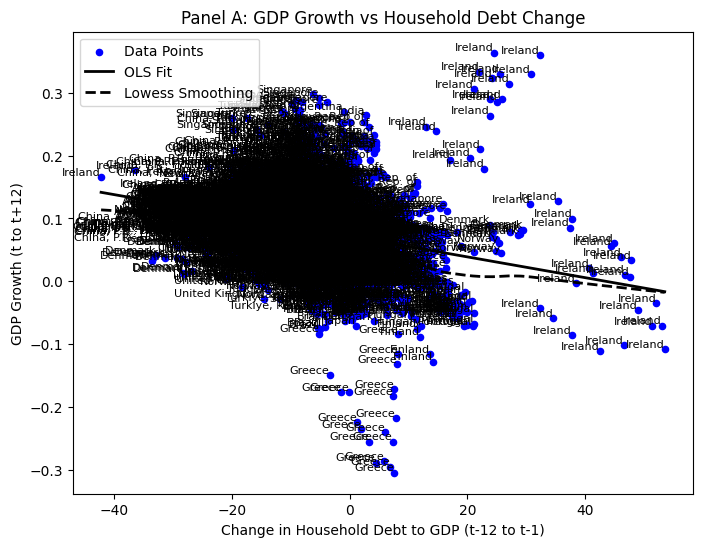

In [160]:
cleaned_df = cleandata(merge_gdp)
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

LAG = 12
cleaned_df['year'] = cleaned_df.index.year
cleaned_df['quarter'] = cleaned_df.index.quarter

# cleaned_df = cleaned_df[cleaned_df['quarter'] == 4]

cleaned_df = cleaned_df.reset_index()
cleaned_df.sort_values(by=['Country', 'TIME_PERIOD'], inplace=True)
cleaned_df = cleaned_df.dropna(subset=['GDP', 'household_debt'])


cleaned_df['lnGDP'] = np.log(cleaned_df['GDP'])
cleaned_df['GDP_growth'] = cleaned_df.groupby('Country')['lnGDP'].diff(periods=12)
cleaned_df['household_debt_GDP_change'] = cleaned_df.groupby('Country')['household_debt'].shift(-1) - cleaned_df.groupby('Country')['household_debt'].shift(-20)

cleaned_df = cleaned_df.dropna(subset=['GDP_growth', 'household_debt_GDP_change'])

# Panel A: Lowess smoothing for GDP growth and household debt to GDP change
lowess_result = sm.nonparametric.lowess(cleaned_df['GDP_growth'], cleaned_df['household_debt_GDP_change'], frac=0.3)
cleaned_df['GDP_growth_lowess'] = np.interp(cleaned_df['household_debt_GDP_change'], lowess_result[:, 0], lowess_result[:, 1])

cleaned_df = cleaned_df.sort_values('household_debt_GDP_change')

fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(cleaned_df['household_debt_GDP_change'], cleaned_df['GDP_growth'], c='blue', label='Data Points', s=20, marker='o')

X = cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1)
y = cleaned_df['GDP_growth']
model = sm.OLS(y, sm.add_constant(X)).fit()
ax.plot(cleaned_df['household_debt_GDP_change'], model.predict(sm.add_constant(cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1))), 
        color='black', lw=2, label='OLS Fit')

ax.plot(lowess_result[:, 0], lowess_result[:, 1], linestyle='--', color='black', label='Lowess Smoothing', lw=2)

# Label each point with its Country
# for i, row in cleaned_df.iterrows():
#     ax.text(row['household_debt_GDP_change'], row['GDP_growth'], row['Country'], fontsize=8, ha='right', va='bottom')

ax.set_xlabel(f"Change in Household Debt to GDP (t-{LAG} to t-1)")
ax.set_ylabel(f"GDP Growth (t to t+{LAG})")
ax.legend()
ax.set_title("Panel A: GDP Growth vs Household Debt Change")

plt.show()


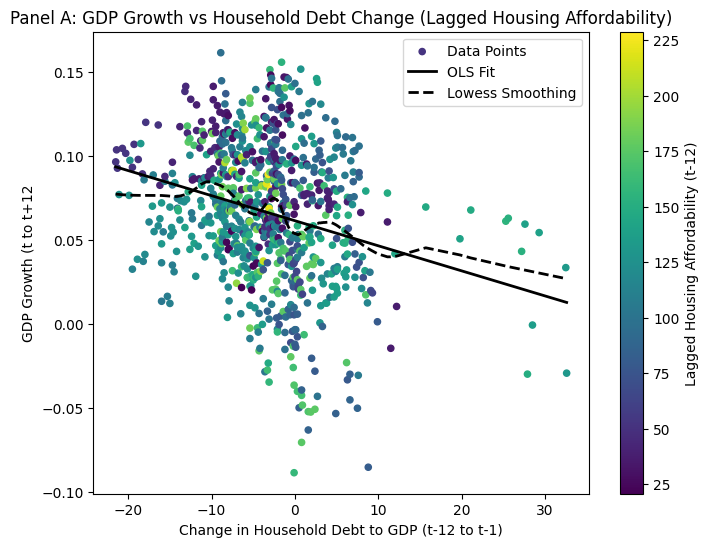

In [230]:
cleaned_df = cleandata(final_df)
GDP_LAG = 12
HHD_LAG = 12
Price_LAG = HHD_LAG 

cleaned_df = cleaned_df.reset_index()
cleaned_df.sort_values(by=['Country', 'TIME_PERIOD'], inplace=True)

cleaned_df['lnGDP'] = np.log(cleaned_df['GDP'])
cleaned_df['GDP_growth'] = cleaned_df.groupby('Country')['lnGDP'].diff(periods= GDP_LAG )
cleaned_df['household_debt_GDP_change'] = cleaned_df.groupby('Country')['household_debt'].shift(-1) - cleaned_df.groupby('Country')['household_debt'].shift(- HHD_LAG)

cleaned_df = cleaned_df.dropna(subset=['GDP_growth', 'household_debt_GDP_change'])
cleaned_df[cleaned_df['Country'] == 'United States']
cleaned_df['housing_affordability_lagged'] = cleaned_df.groupby('Country')['Housing_Affordability'].shift(LAG)

cleaned_df = cleaned_df.dropna(subset=['housing_affordability_lagged'])

# Panel A: Lowess smoothing for GDP growth and household debt to GDP change
lowess_result = sm.nonparametric.lowess(cleaned_df['GDP_growth'], cleaned_df['household_debt_GDP_change'], frac=0.3)
cleaned_df['GDP_growth_lowess'] = np.interp(cleaned_df['household_debt_GDP_change'], lowess_result[:, 0], lowess_result[:, 1])

cleaned_df = cleaned_df.sort_values('household_debt_GDP_change')


fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(cleaned_df['household_debt_GDP_change'], cleaned_df['GDP_growth'], 
                     c=cleaned_df['housing_affordability_lagged'], cmap='viridis', label='Data Points', s=20, marker='o')

X = cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1)
y = cleaned_df['GDP_growth']
model = sm.OLS(y, sm.add_constant(X)).fit()


ax.plot(cleaned_df['household_debt_GDP_change'], model.predict(sm.add_constant(cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1))), 
        color='black', lw=2, label='OLS Fit')

ax.plot(lowess_result[:, 0], lowess_result[:, 1], linestyle='--', color='black', label='Lowess Smoothing', lw=2)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(f'Lagged Housing Affordability (t-{LAG})')

ax.set_xlabel(f"Change in Household Debt to GDP (t-{HHD_LAG} to t-1)")
ax.set_ylabel(f"GDP Growth (t to t+{GDP_LAG}")
ax.legend()
ax.set_title("Panel A: GDP Growth vs Household Debt Change (Lagged Housing Affordability)")

plt.show()

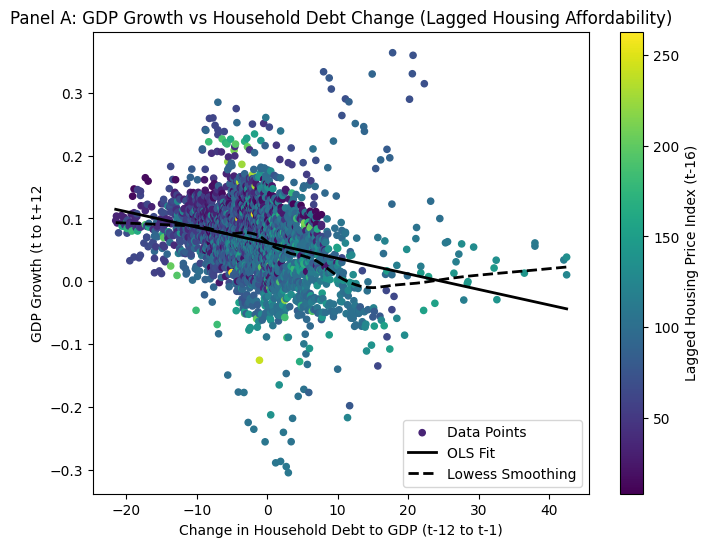

In [232]:
cleaned_df = cleandata(merge_hp)


GDP_LAG = 12
HHD_LAG = 12
Price_LAG = HHD_LAG

cleaned_df = cleaned_df.reset_index()
cleaned_df.sort_values(by=['Country', 'TIME_PERIOD'], inplace=True)

cleaned_df['lnGDP'] = np.log(cleaned_df['GDP'])
cleaned_df['GDP_growth'] = cleaned_df.groupby('Country')['lnGDP'].diff(periods= GDP_LAG )
cleaned_df['household_debt_GDP_change'] = cleaned_df.groupby('Country')['household_debt'].shift(-1) - cleaned_df.groupby('Country')['household_debt'].shift(-HHD_LAG)

cleaned_df = cleaned_df.dropna(subset=['GDP_growth', 'household_debt_GDP_change'])
cleaned_df[cleaned_df['Country'] == 'United States']
cleaned_df['housing_price_lagged'] = cleaned_df.groupby('Country')['housing_price'].shift(Price_LAG)

cleaned_df = cleaned_df.dropna(subset=['housing_price_lagged'])

# Panel A: Lowess smoothing for GDP growth and household debt to GDP change
lowess_result = sm.nonparametric.lowess(cleaned_df['GDP_growth'], cleaned_df['household_debt_GDP_change'], frac=0.3)
cleaned_df['GDP_growth_lowess'] = np.interp(cleaned_df['household_debt_GDP_change'], lowess_result[:, 0], lowess_result[:, 1])

cleaned_df = cleaned_df.sort_values('household_debt_GDP_change')


fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(cleaned_df['household_debt_GDP_change'], cleaned_df['GDP_growth'], 
                     c=cleaned_df['housing_price_lagged'], cmap='viridis', label='Data Points', s=20, marker='o')

X = cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1)
y = cleaned_df['GDP_growth']
model = sm.OLS(y, sm.add_constant(X)).fit()


ax.plot(cleaned_df['household_debt_GDP_change'], model.predict(sm.add_constant(cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1))), 
        color='black', lw=2, label='OLS Fit')

ax.plot(lowess_result[:, 0], lowess_result[:, 1], linestyle='--', color='black', label='Lowess Smoothing', lw=2)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(f'Lagged Housing Price Index (t-{Price_LAG})')

ax.set_xlabel(f"Change in Household Debt to GDP (t-{HHD_LAG} to t-1)")
ax.set_ylabel(f"GDP Growth (t to t+{GDP_LAG}")
ax.legend()
ax.set_title("Panel A: GDP Growth vs Household Debt Change (Lagged Housing Affordability)")

plt.show()